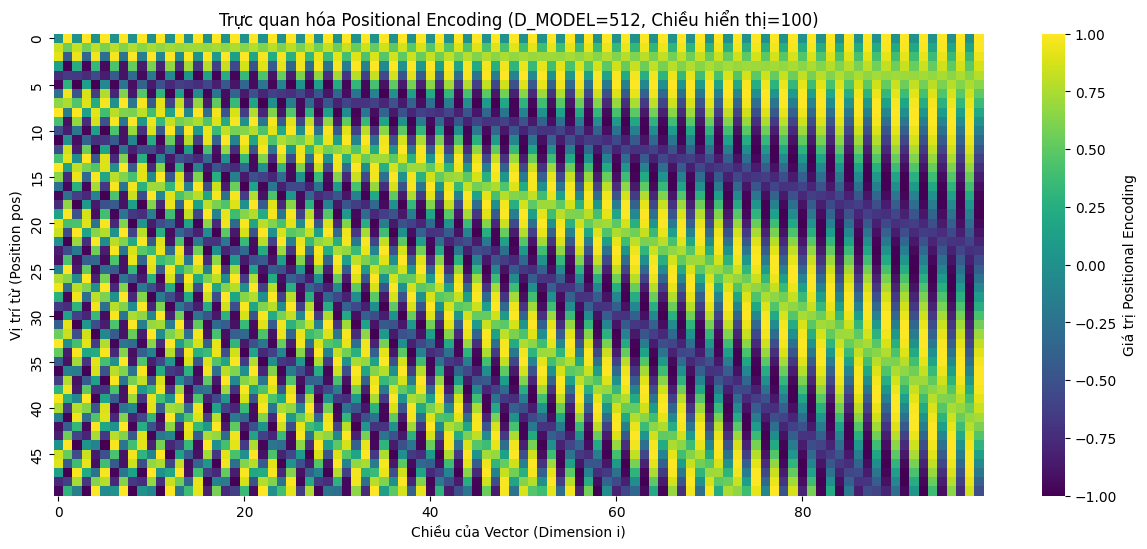

In [2]:
# ----------------------------------------------
# NOTEBOOK CODE TEMPLATE: POSITIONAL ENCODING VISUALIZATION
# ----------------------------------------------

# 1. Cài đặt và Import các thư viện cần thiết
# (Chỉ cần chạy một lần)
# import sys
# !{sys.executable} -m pip install torch numpy matplotlib seaborn

import torch
import torch.nn as nn
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Định nghĩa Lớp PositionalEncoding (PE)
# Lớp này giống như lớp bạn đã trình bày trong báo cáo
class PositionalEncoding(nn.Module):
    """
    Tạo ma trận Mã hóa Vị trí (PE) theo công thức sin/cos
    được đề xuất trong kiến trúc Transformer.
    """
    def __init__(self, d_model: int, seq_len: int, dropout: float = 0.1) -> None:
        super().__init__()
        self.d_model = d_model # Chiều của mô hình
        self.seq_len = seq_len # Chiều dài chuỗi tối đa
        self.dropout = nn.Dropout(dropout)
        
        # Khởi tạo ma trận PE: (seq_len, d_model)
        pe = torch.zeros(seq_len, d_model)
        
        # Tạo vector vị trí: (seq_len, 1)
        position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
        
        # Tính toán term tần số (term mẫu số)
        # log(10000.0) / d_model được dùng để tính mũ -2i/d_model
        div_term = torch.exp(
            torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model)
        )
        
        # Áp dụng công thức cho các chiều chẵn (2i) - sử dụng SIN
        pe[:, 0::2] = torch.sin(position * div_term)
        
        # Áp dụng công thức cho các chiều lẻ (2i+1) - sử dụng COS
        pe[:, 1::2] = torch.cos(position * div_term)
        
        # Thêm chiều batch (1, seq_len, d_model) và đăng ký là buffer
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # Cộng PE vào vector nhúng đầu vào (x)
        # Chỉ lấy số lượng vị trí (chiều thứ 1) cần thiết
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x) 

# 3. Code Trực quan hóa Heatmap

# --- Cấu hình Tham số Visualization ---
D_MODEL = 512       
MAX_SEQ_LEN = 50    # Chiều dài chuỗi hiển thị
PE_DIMS_TO_SHOW = 100 # Số chiều d_model muốn hiển thị (từ 0 đến 99)

# Khởi tạo lớp PE (chỉ dùng để lấy ma trận pe)
pe_layer = PositionalEncoding(d_model=D_MODEL, seq_len=MAX_SEQ_LEN)

# Lấy ma trận PE (là một buffer trong lớp)
# [1, MAX_SEQ_LEN, D_MODEL] -> [MAX_SEQ_LEN, PE_DIMS_TO_SHOW]
pe_matrix = pe_layer.pe.squeeze(0).cpu().numpy()[:MAX_SEQ_LEN, :PE_DIMS_TO_SHOW]

# Tạo Figure và Heatmap
plt.figure(figsize=(15, 6))

sns.heatmap(pe_matrix, 
            cmap='viridis',        # Thay đổi màu sắc nếu muốn
            xticklabels=20,        # Hiển thị nhãn X mỗi 20 chiều
            yticklabels=5,         # Hiển thị nhãn Y mỗi 5 vị trí
            cbar_kws={'label': 'Giá trị Positional Encoding'}) 

plt.xlabel('Chiều của Vector (Dimension i)')
plt.ylabel('Vị trí từ (Position pos)')
plt.title(f'Trực quan hóa Positional Encoding (D_MODEL={D_MODEL}, Chiều hiển thị={PE_DIMS_TO_SHOW})')

plt.show()